In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing. CSV file I/O (eg pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os


ModuleNotFoundError: No module named 'seaborn'

In [4]:
data = pd.read_csv("/home/inlab/Downloads/Endorserdataset.csv")
data.head()

,DelayNetwork,ComfirmationTime,EndorsingPeer,IsTrustable
0,45,3567,1,1
1,34,3432,1,1
2,76,4577,1,0
3,78,5674,1,0
4,34,3345,1,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(10, 2)
Shape of y:(10,)


In [8]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

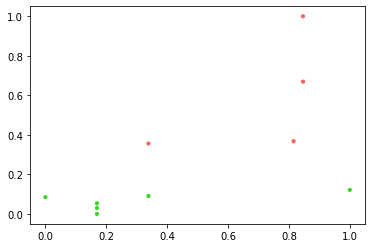

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show() 

In [19]:

#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

#2 Importing the dataset
dataset = pd.read_csv('/home/inlab/Downloads/MLDataset1.csv')
X = dataset.iloc[:, :3 ].values
y = dataset.iloc[:, 3].values

#3 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#4 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#5 Fitting Kernel SVM classifier to the Training set
# Create your classifier object here
from sklearn.svm import SVC 
#Lets choose Gaussian kernel 
classifier = SVC(kernel='rbf', random_state=0 )
classifier.fit(X_train, y_train)

#6 Predicting the Test set results
y_pred = classifier.predict(X_test)
print (accuracy_score(y_test, y_pred))
#7 Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#8 Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Training set)')
plt.xlabel('DelayNetwork')
plt.ylabel('ConfirmationTime')
plt.legend()
plt.show()

#9 Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Test set)')
plt.xlabel('DelayNetwork')
plt.ylabel('ConfirmationTime')
plt.legend()
plt.show()

0.8181818181818182


ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

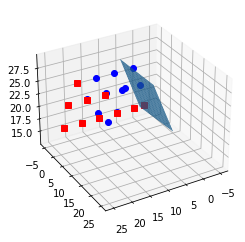

In [6]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

dataset = pd.read_csv("/home/inlab/Downloads/Endorserdataset.csv")
X = dataset.iloc[:, [0,1,2] ].values
Y = dataset.iloc[:, 3].values

#make it binary classification problem


model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()